****Stock Analysis****

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew
import warnings

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
warnings.filterwarnings('ignore')

In [2]:
data_frame = pd.read_csv('PETR4_2018-07-02_2019-01-31.csv')

In [3]:
data_frame.count()

Start                        17544
End                          17544
NegociatedOffersAmount       17544
TotalTradedQuantity          17544
RSIIndicator                 17544
SMAIndicatorDiff             17544
EMAIndicatorDiff             17544
UpperBollingerBand           17544
LowerBollingerBand           17544
MiddleBollingerBand          17544
MACD                         17544
AroonUpIndicator             17544
AroonDownIndicator           17544
AroonIndicator               17544
PlusDirectionalIndicator     17544
MinusDirectionalIndicator    17544
ADXIndicator                 17544
CCI                          17544
CMO                          17544
ROC                          17544
BuySignal                    17544
BidPrice                     17544
Profit                       17544
dtype: int64

In [4]:
len(data_frame[data_frame['BuySignal'] == 1].index)/len(data_frame.index)

0.667407660738714

In [5]:
data_frame.head()

,Start,End,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicatorDiff,EMAIndicatorDiff,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,...,AroonIndicator,PlusDirectionalIndicator,MinusDirectionalIndicator,ADXIndicator,CCI,CMO,ROC,BuySignal,BidPrice,Profit
0,02/07/2018 11:26:00,02/07/2018 11:29:00,138,142000,0.580645,0.007143,0.008072,0.055824,-0.070110,-0.007143,...,21.428571,17.353007,9.422456,0.000000,43.358608,29.411765,0.0,1,17.12,0.01
1,02/07/2018 11:29:00,02/07/2018 11:32:00,134,92400,0.545455,0.015000,0.015662,0.046644,-0.076644,-0.015000,...,21.428571,15.600818,8.471040,0.000000,32.444284,56.756757,0.0,1,17.12,0.01
2,02/07/2018 11:32:00,02/07/2018 11:35:00,142,117700,0.558824,0.012143,0.013574,0.048204,-0.072490,-0.012143,...,21.428571,16.375579,7.605254,57.232231,34.193791,51.515152,0.0,1,17.13,0.01
3,02/07/2018 11:35:00,02/07/2018 11:38:00,231,609200,0.593750,0.017857,0.020431,0.036025,-0.071739,-0.017857,...,14.285714,14.877169,6.909353,59.473340,44.188067,71.428571,0.0,1,17.14,0.01
4,02/07/2018 11:38:00,02/07/2018 11:41:00,264,340000,0.606061,0.022857,0.026373,0.022499,-0.068213,-0.022857,...,-14.285714,20.721666,6.099163,49.137991,47.595526,80.000000,0.0,1,17.14,0.01


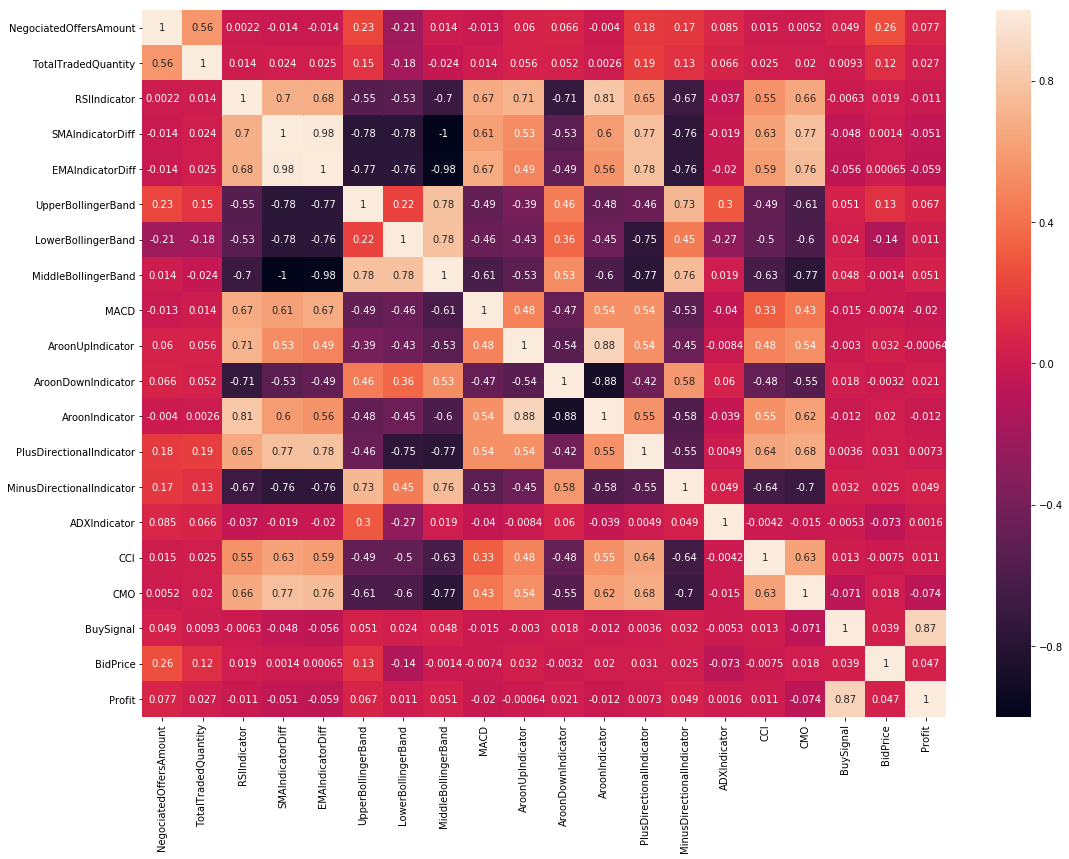

In [6]:
temp = data_frame.drop(["ROC"], axis=1)

correlation_matrix = temp.corr()
f, ax = plt.subplots(figsize=(18, 13))
sns.heatmap(correlation_matrix, annot=True)

In [7]:
x_train = data_frame.drop(["Start", "End"], axis=1)
x_train.head()

,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicatorDiff,EMAIndicatorDiff,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,MACD,AroonUpIndicator,...,AroonIndicator,PlusDirectionalIndicator,MinusDirectionalIndicator,ADXIndicator,CCI,CMO,ROC,BuySignal,BidPrice,Profit
0,138,142000,0.580645,0.007143,0.008072,0.055824,-0.070110,-0.007143,0.025476,42.857143,...,21.428571,17.353007,9.422456,0.000000,43.358608,29.411765,0.0,1,17.12,0.01
1,134,92400,0.545455,0.015000,0.015662,0.046644,-0.076644,-0.015000,0.024809,35.714286,...,21.428571,15.600818,8.471040,0.000000,32.444284,56.756757,0.0,1,17.12,0.01
2,142,117700,0.558824,0.012143,0.013574,0.048204,-0.072490,-0.012143,0.024003,28.571429,...,21.428571,16.375579,7.605254,57.232231,34.193791,51.515152,0.0,1,17.13,0.01
3,231,609200,0.593750,0.017857,0.020431,0.036025,-0.071739,-0.017857,0.023896,21.428571,...,14.285714,14.877169,6.909353,59.473340,44.188067,71.428571,0.0,1,17.14,0.01
4,264,340000,0.606061,0.022857,0.026373,0.022499,-0.068213,-0.022857,0.024338,14.285714,...,-14.285714,20.721666,6.099163,49.137991,47.595526,80.000000,0.0,1,17.14,0.01


In [8]:
x_train['NegociatedOffersAmount'] = np.log(x_train['NegociatedOffersAmount'])
x_train['TotalTradedQuantity'] = np.log(x_train['TotalTradedQuantity'])
x_train.head()

,NegociatedOffersAmount,TotalTradedQuantity,RSIIndicator,SMAIndicatorDiff,EMAIndicatorDiff,UpperBollingerBand,LowerBollingerBand,MiddleBollingerBand,MACD,AroonUpIndicator,...,AroonIndicator,PlusDirectionalIndicator,MinusDirectionalIndicator,ADXIndicator,CCI,CMO,ROC,BuySignal,BidPrice,Profit
0,4.927254,11.863582,0.580645,0.007143,0.008072,0.055824,-0.070110,-0.007143,0.025476,42.857143,...,21.428571,17.353007,9.422456,0.000000,43.358608,29.411765,0.0,1,17.12,0.01
1,4.897840,11.433882,0.545455,0.015000,0.015662,0.046644,-0.076644,-0.015000,0.024809,35.714286,...,21.428571,15.600818,8.471040,0.000000,32.444284,56.756757,0.0,1,17.12,0.01
2,4.955827,11.675894,0.558824,0.012143,0.013574,0.048204,-0.072490,-0.012143,0.024003,28.571429,...,21.428571,16.375579,7.605254,57.232231,34.193791,51.515152,0.0,1,17.13,0.01
3,5.442418,13.319902,0.593750,0.017857,0.020431,0.036025,-0.071739,-0.017857,0.023896,21.428571,...,14.285714,14.877169,6.909353,59.473340,44.188067,71.428571,0.0,1,17.14,0.01
4,5.575949,12.736701,0.606061,0.022857,0.026373,0.022499,-0.068213,-0.022857,0.024338,14.285714,...,-14.285714,20.721666,6.099163,49.137991,47.595526,80.000000,0.0,1,17.14,0.01


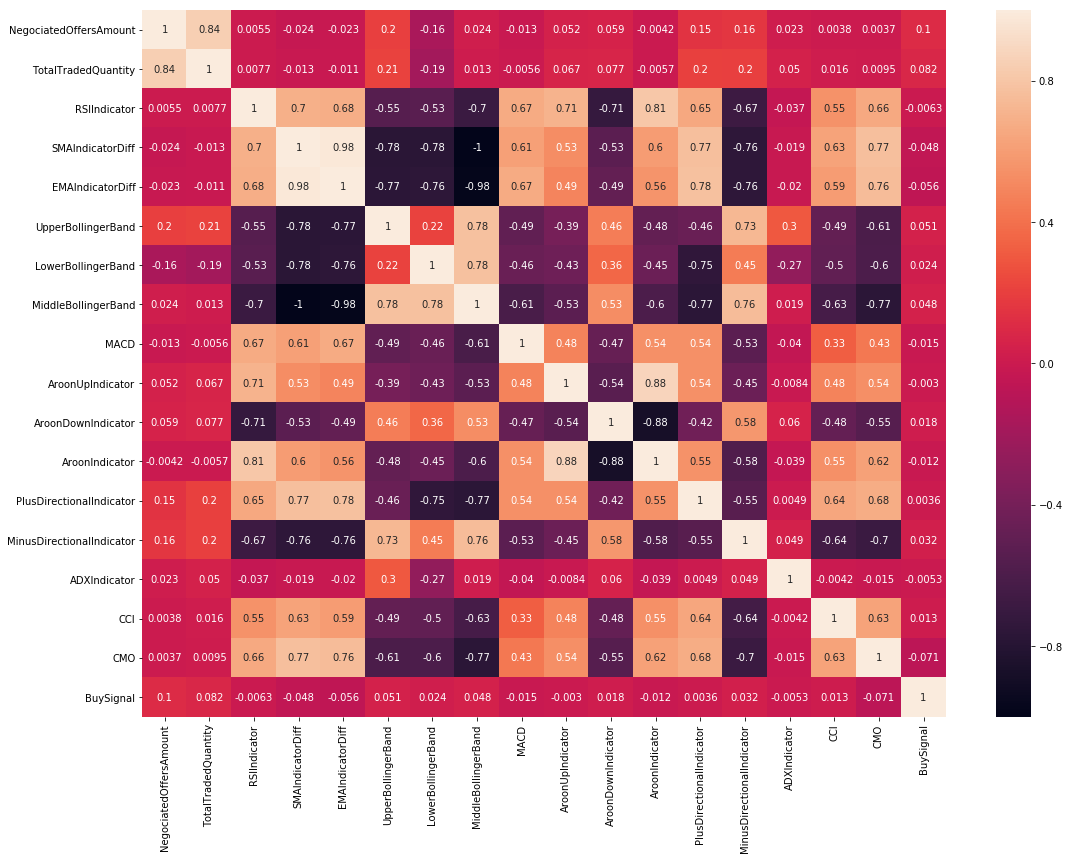

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

profit = x_train["Profit"]
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled, index=x_train.index, columns=x_train.columns)
x_train.head()

temp = x_train.drop(["ROC", "BidPrice","Profit"], axis=1)

correlation_matrix = temp.corr()
f, ax = plt.subplots(figsize=(18, 13))
sns.heatmap(correlation_matrix, annot=True)

x_train = x_train.dropna()
#y_train = x_train["BuySignal"]
#x_train = x_train.drop(["BidPrice"], axis=1)

Percorrendo blocos de N dias com M intervalos de 1 minuto para mensurar acurácia balanceada:

In [10]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from random import randint

average_data_per_day = 120
max_days_interval = 120
future_days_to_measure = 1
total_data = len(data_frame.index)
total_iterations = total_data//average_data_per_day
days = []
logreg_precisions = []
logreg_recalls = []
logreg_f1 = []
logreg_profit = []
logreg_random_profit = []
mlp_precisions = []
mlp_recalls = []
mlp_f1 = []
mlp_profit = []
mlp_random_profit = []

mlp_total_profit = []
logreg_total_profit = []
price_variation = []

for i in range(max_days_interval):
    day = i + 1
    print ("Days used to train: " + str(day))
    print ("Days to be predicted: " + str(future_days_to_measure))
    acc_mlp_score_arr = []
    acc_logreg_score_arr = []
    mlp_score_arr = []
    logreg_score_arr = []
    mlp_precision_arr = []
    logreg_precision_arr = []
    mlp_recall_arr = []
    logreg_recall_arr = []
    mlp_profit_arr = []
    logreg_profit_arr = []
    mlp_random_profit_arr = []
    logreg_random_profit_arr = []
    mlp_f1_arr = []
    logreg_f1_arr = []
    
    
    for j in range(total_iterations):
        min_range = j * average_data_per_day
        middle_range = min_range + day * average_data_per_day
        max_range = middle_range + average_data_per_day      
        
        if (day == 1): 
            start_price = x_train['BidPrice'].as_matrix()[middle_range]
            end_price = x_train['BidPrice'].as_matrix()[len(x_train.index) - 1]
            price_variation.append(end_price - start_price)
        
        if (len(x_train[min_range:middle_range].index) > 0 and len(x_train[middle_range:max_range].index) > 0):
                        
            day_mlp_profit_arr = []
            day_logreg_profit_arr = []
            day_random_mlp_profit_arr = []
            day_random_logreg_profit_arr = []
            #print("(MiddleRange,MaxRange): (" + str(middle_range) + "," + str (max_range) + ")")
            new_mlp = MLPClassifier(hidden_layer_sizes=[100], max_iter=1000)
            
            current_profit = profit[middle_range:max_range]
            
            #print ("Distribution before: " + str(len(x_train[min_range:middle_range][x_train[min_range:middle_range]['BuySignal'] == 1].index)/len(x_train[min_range:middle_range].index)))
            
            g = x_train[min_range:middle_range].groupby('BuySignal')
            x_train_balanced = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
            #print ("Distribution after: " + str(len(x_train_balanced[x_train_balanced['BuySignal'] == 1].index)/len(x_train_balanced.index)))
            
            new_mlp.fit(x_train_balanced.drop(["BuySignal", "Profit", "BidPrice"], axis=1), x_train_balanced["BuySignal"])
            y_predict = new_mlp.predict(x_train[middle_range:max_range].drop(["BuySignal", "Profit", "BidPrice"], axis=1))
            
            for s in range(len(y_predict)):
                if y_predict[s] == 1:
                    day_mlp_profit_arr.append(current_profit.as_matrix()[s])
                    day_random_mlp_profit_arr.append(current_profit.as_matrix()[randint(0, len(y_predict) - 1)])
            
            #print("MLP (tn, fp, fn, tp): " + str(confusion_matrix(y_train[middle_range:max_range], y_predict).ravel()))
            #print("MLP Precision: " + str(precision_score(y_train[middle_range:max_range], y_predict, average = 'binary', pos_label=1)))
            mlp_precision_arr.append(precision_score(x_train[middle_range:max_range]["BuySignal"], y_predict))
            mlp_recall_arr.append(recall_score(x_train[middle_range:max_range]["BuySignal"], y_predict))
            mlp_f1_arr.append(f1_score(x_train[middle_range:max_range]["BuySignal"], y_predict))
            
            acc_mlp_score = accuracy_score(x_train[middle_range:max_range]["BuySignal"], y_predict)
            acc_mlp_score_arr.append(acc_mlp_score)
            mlp_score = balanced_accuracy_score(x_train[middle_range:max_range]["BuySignal"], y_predict)
            mlp_score_arr.append(mlp_score)
            
            new_logreg = LogisticRegression(C=100)
            new_logreg.fit(x_train_balanced.drop(["BuySignal", "Profit", "BidPrice"], axis=1), x_train_balanced["BuySignal"])
            y_predict = new_logreg.predict(x_train[middle_range:max_range].drop(["BuySignal", "Profit", "BidPrice"], axis=1))
            
            for s in range(len(y_predict)):
                if y_predict[s] == 1:
                    day_logreg_profit_arr.append(current_profit.as_matrix()[s])
                    day_random_logreg_profit_arr.append(current_profit.as_matrix()[randint(0, len(y_predict) - 1)])
                  
            #print("LogReg (tn, fp, fn, tp): " + str(confusion_matrix(y_train[middle_range:max_range], y_predict).ravel()))
            #print("LogReg Precision: " + str(precision_score(y_train[middle_range:max_range], y_predict, average = 'binary', pos_label=1)))     
            logreg_precision_arr.append(precision_score(x_train[middle_range:max_range]["BuySignal"], y_predict))
            logreg_recall_arr.append(recall_score(x_train[middle_range:max_range]["BuySignal"], y_predict))
            logreg_f1_arr.append(f1_score(x_train[middle_range:max_range]["BuySignal"], y_predict))
            
            acc_logreg_score = accuracy_score(x_train[middle_range:max_range]["BuySignal"], y_predict)
            acc_logreg_score_arr.append(acc_logreg_score)
            logreg_score = balanced_accuracy_score(x_train[middle_range:max_range]["BuySignal"], y_predict)
            logreg_score_arr.append(logreg_score)
            
            mlp_profit_arr.append(np.sum(day_mlp_profit_arr))
            logreg_profit_arr.append(np.sum(day_logreg_profit_arr))
            mlp_random_profit_arr.append(np.sum(day_random_mlp_profit_arr))
            logreg_random_profit_arr.append(np.sum(day_random_logreg_profit_arr))
                                                        
      
    print ("MLP Average Accuracy Score: " + str(np.sum(acc_mlp_score_arr)/len(acc_mlp_score_arr)))
    print ("MLP Average Balanced Accuracy Score: " + str(np.sum(mlp_score_arr)/len(mlp_score_arr)))  
    print ("MLP Average Precision Score: " + str(np.sum(mlp_precision_arr)/len(mlp_precision_arr)))
    print ("MLP Average Recall Score: " + str(np.sum(mlp_recall_arr)/len(mlp_recall_arr)))
    print ("MLP Average f1 Score: " + str(np.sum(mlp_f1_arr)/len(mlp_f1_arr)))
    print ("MLP Average Profit: " + str(np.sum(mlp_profit_arr)/len(mlp_profit_arr)))
    print ("MLP Random Average Profit: " + str(np.sum(mlp_random_profit_arr)/len(mlp_random_profit_arr)))
      
    print ("LogReg Average Accuracy Score: " + str(np.sum(acc_logreg_score_arr)/len(acc_logreg_score_arr))) 
    print ("LogReg Average Balanced Accuracy Score: " + str(np.sum(logreg_score_arr)/len(logreg_score_arr)))  
    print ("LogReg Average Precision Score: " + str(np.sum(logreg_precision_arr)/len(logreg_precision_arr)))
    print ("LogReg Average Recall Score: " + str(np.sum(logreg_recall_arr)/len(logreg_recall_arr)))
    print ("LogReg Average f1 Score: " + str(np.sum(logreg_f1_arr)/len(logreg_f1_arr)))
    print ("LogReg Average Profit: " + str(np.sum(logreg_profit_arr)/len(logreg_profit_arr)))
    print ("LogReg Random Average Profit: " + str(np.sum(logreg_random_profit_arr)/len(logreg_random_profit_arr)))
    
    logreg_precisions.append(np.sum(logreg_precision_arr)/len(logreg_precision_arr))
    logreg_recalls.append(np.sum(logreg_recall_arr)/len(logreg_recall_arr))
    logreg_f1.append(np.sum(logreg_f1_arr)/len(logreg_f1_arr))
    logreg_profit.append(np.sum(logreg_profit_arr)/len(logreg_profit_arr))
    logreg_total_profit.append(np.sum(logreg_profit_arr))
    logreg_random_profit.append(np.sum(logreg_random_profit_arr)/len(logreg_random_profit_arr))
                                                        
    mlp_precisions.append(np.sum(mlp_precision_arr)/len(mlp_precision_arr))
    mlp_recalls.append(np.sum(mlp_recall_arr)/len(mlp_recall_arr))
    mlp_f1.append(np.sum(mlp_f1_arr)/len(mlp_f1_arr))
    mlp_profit.append(np.sum(mlp_profit_arr)/len(mlp_profit_arr))
    mlp_total_profit.append(np.sum(mlp_profit_arr))
    mlp_random_profit.append(np.sum(mlp_random_profit_arr)/len(mlp_random_profit_arr))
    days.append(day)

Days used to train: 1
Days to be predicted: 1
MLP Average Accuracy Score: 0.5278538812785388
MLP Average Balanced Accuracy Score: 0.5198957910846765
MLP Average Precision Score: 0.685567878726275
MLP Average Recall Score: 0.5446594432078266
MLP Average f1 Score: 0.5928946574360315
MLP Average Profit: 0.15061643835616442
MLP Random Average Profit: 0.11541095890410957
LogReg Average Accuracy Score: 0.5337899543378996
LogReg Average Balanced Accuracy Score: 0.5274674785453584
LogReg Average Precision Score: 0.687824487471848
LogReg Average Recall Score: 0.5525684425760881
LogReg Average f1 Score: 0.5946443057608284
LogReg Average Profit: 0.15575342465753425
LogReg Random Average Profit: 0.10623287671232863
Days used to train: 2
Days to be predicted: 1
MLP Average Accuracy Score: 0.5295402298850574
MLP Average Balanced Accuracy Score: 0.5179768230307091
MLP Average Precision Score: 0.6806111105385628
MLP Average Recall Score: 0.545076059507474
MLP Average f1 Score: 0.590790177073152
MLP Av

MLP Average Accuracy Score: 0.5485696517412935
MLP Average Balanced Accuracy Score: 0.5377345086738634
MLP Average Precision Score: 0.7034382254647076
MLP Average Recall Score: 0.5634383420863208
MLP Average f1 Score: 0.6137195210944643
MLP Average Profit: 0.1861194029850746
MLP Random Average Profit: 0.11701492537313438
LogReg Average Accuracy Score: 0.5550373134328358
LogReg Average Balanced Accuracy Score: 0.5420736339291825
LogReg Average Precision Score: 0.7063543840727952
LogReg Average Recall Score: 0.5698993438489565
LogReg Average f1 Score: 0.6208456443457258
LogReg Average Profit: 0.19611940298507466
LogReg Random Average Profit: 0.12037313432835801
Days used to train: 14
Days to be predicted: 1
MLP Average Accuracy Score: 0.5538220551378445
MLP Average Balanced Accuracy Score: 0.5432643776004721
MLP Average Precision Score: 0.7083291796692992
MLP Average Recall Score: 0.5640712414165833
MLP Average f1 Score: 0.6153165628634568
MLP Average Profit: 0.19864661654135332
MLP Rand

MLP Average Accuracy Score: 0.5609289617486339
MLP Average Balanced Accuracy Score: 0.5504228969303027
MLP Average Precision Score: 0.7237469779703649
MLP Average Recall Score: 0.5820065491234945
MLP Average f1 Score: 0.6327411613302326
MLP Average Profit: 0.224344262295082
MLP Random Average Profit: 0.13836065573770526
LogReg Average Accuracy Score: 0.5600409836065573
LogReg Average Balanced Accuracy Score: 0.5528786396529733
LogReg Average Precision Score: 0.7292528798260819
LogReg Average Recall Score: 0.5675128013878974
LogReg Average f1 Score: 0.6279972334534565
LogReg Average Profit: 0.2317213114754098
LogReg Random Average Profit: 0.1473770491803279
Days used to train: 26
Days to be predicted: 1
MLP Average Accuracy Score: 0.5646005509641873
MLP Average Balanced Accuracy Score: 0.5469064515040026
MLP Average Precision Score: 0.7194831901924046
MLP Average Recall Score: 0.5869720971300355
MLP Average f1 Score: 0.6369964504989327
MLP Average Profit: 0.23066115702479334
MLP Random 

MLP Average Accuracy Score: 0.5709848484848485
MLP Average Balanced Accuracy Score: 0.5528125390962068
MLP Average Precision Score: 0.725697428364954
MLP Average Recall Score: 0.59668558061434
MLP Average f1 Score: 0.6426565784850016
MLP Average Profit: 0.24236363636363623
MLP Random Average Profit: 0.14799999999999996
LogReg Average Accuracy Score: 0.558939393939394
LogReg Average Balanced Accuracy Score: 0.5536069554278265
LogReg Average Precision Score: 0.7312326452654292
LogReg Average Recall Score: 0.5659746194155573
LogReg Average f1 Score: 0.627180585754086
LogReg Average Profit: 0.23281818181818179
LogReg Random Average Profit: 0.1554545454545456
Days used to train: 38
Days to be predicted: 1
MLP Average Accuracy Score: 0.5633792048929663
MLP Average Balanced Accuracy Score: 0.5539786417695651
MLP Average Precision Score: 0.7265035013952158
MLP Average Recall Score: 0.5752930710489811
MLP Average f1 Score: 0.6298339088990962
MLP Average Profit: 0.23431192660550448
MLP Random Av

MLP Average Accuracy Score: 0.5784863945578231
MLP Average Balanced Accuracy Score: 0.5545508746763892
MLP Average Precision Score: 0.7287652111647431
MLP Average Recall Score: 0.6176733829210352
MLP Average f1 Score: 0.6562035150764782
MLP Average Profit: 0.25377551020408157
MLP Random Average Profit: 0.18061224489795918
LogReg Average Accuracy Score: 0.565561224489796
LogReg Average Balanced Accuracy Score: 0.5490991891534935
LogReg Average Precision Score: 0.7291951166974332
LogReg Average Recall Score: 0.5878647902713127
LogReg Average f1 Score: 0.6413821725894732
LogReg Average Profit: 0.24459183673469378
LogReg Random Average Profit: 0.13499999999999976
Days used to train: 50
Days to be predicted: 1
MLP Average Accuracy Score: 0.5731958762886598
MLP Average Balanced Accuracy Score: 0.5456947686860903
MLP Average Precision Score: 0.7259057920474521
MLP Average Recall Score: 0.6191798503244587
MLP Average f1 Score: 0.6536134587258436
MLP Average Profit: 0.25000000000000006
MLP Rand

MLP Average Accuracy Score: 0.5772286821705426
MLP Average Balanced Accuracy Score: 0.5495465938454488
MLP Average Precision Score: 0.7300665156007722
MLP Average Recall Score: 0.6231375086528773
MLP Average f1 Score: 0.6582219788232498
MLP Average Profit: 0.2556976744186045
MLP Random Average Profit: 0.20662790697674402
LogReg Average Accuracy Score: 0.5732558139534883
LogReg Average Balanced Accuracy Score: 0.5534842176090964
LogReg Average Precision Score: 0.7335349257541842
LogReg Average Recall Score: 0.6082389043643137
LogReg Average f1 Score: 0.655770646483045
LogReg Average Profit: 0.25604651162790687
LogReg Random Average Profit: 0.193720930232558
Days used to train: 62
Days to be predicted: 1
MLP Average Accuracy Score: 0.5858823529411764
MLP Average Balanced Accuracy Score: 0.5536953133208007
MLP Average Precision Score: 0.7314010915091138
MLP Average Recall Score: 0.6341004654551695
MLP Average f1 Score: 0.6689227211907531
MLP Average Profit: 0.27164705882352935
MLP Random 

MLP Average Accuracy Score: 0.5949324324324323
MLP Average Balanced Accuracy Score: 0.5601852816301004
MLP Average Precision Score: 0.741607120859116
MLP Average Recall Score: 0.6494605287427014
MLP Average f1 Score: 0.6819095877257637
MLP Average Profit: 0.2871621621621622
MLP Random Average Profit: 0.21364864864864844
LogReg Average Accuracy Score: 0.5800675675675675
LogReg Average Balanced Accuracy Score: 0.5561387275365565
LogReg Average Precision Score: 0.7410597127032208
LogReg Average Recall Score: 0.6137409720305927
LogReg Average f1 Score: 0.6617809633333894
LogReg Average Profit: 0.27270270270270264
LogReg Random Average Profit: 0.2000000000000001
Days used to train: 74
Days to be predicted: 1
MLP Average Accuracy Score: 0.5764840182648402
MLP Average Balanced Accuracy Score: 0.5499519031735104
MLP Average Precision Score: 0.7364281267752972
MLP Average Recall Score: 0.6120809194660388
MLP Average f1 Score: 0.6555389865189731
MLP Average Profit: 0.25767123287671223
MLP Random

MLP Average Accuracy Score: 0.590725806451613
MLP Average Balanced Accuracy Score: 0.5481484277829447
MLP Average Precision Score: 0.7362472583008405
MLP Average Recall Score: 0.6469102562084381
MLP Average f1 Score: 0.6796627703890157
MLP Average Profit: 0.28080645161290313
MLP Random Average Profit: 0.20500000000000007
LogReg Average Accuracy Score: 0.5809139784946236
LogReg Average Balanced Accuracy Score: 0.5551873412402852
LogReg Average Precision Score: 0.7453651742073034
LogReg Average Recall Score: 0.6118910755843895
LogReg Average f1 Score: 0.66185352423939
LogReg Average Profit: 0.2787096774193548
LogReg Random Average Profit: 0.203225806451613
Days used to train: 86
Days to be predicted: 1
MLP Average Accuracy Score: 0.5960382513661204
MLP Average Balanced Accuracy Score: 0.5530311128620864
MLP Average Precision Score: 0.7424064223047234
MLP Average Recall Score: 0.6475491942060283
MLP Average f1 Score: 0.6828642987573658
MLP Average Profit: 0.28409836065573774
MLP Random Av

MLP Average Accuracy Score: 0.597
MLP Average Balanced Accuracy Score: 0.5561839148292146
MLP Average Precision Score: 0.749327007884579
MLP Average Recall Score: 0.6445506279284392
MLP Average f1 Score: 0.6802045635283176
MLP Average Profit: 0.28559999999999997
MLP Random Average Profit: 0.2246000000000001
LogReg Average Accuracy Score: 0.5820000000000001
LogReg Average Balanced Accuracy Score: 0.5589635373933529
LogReg Average Precision Score: 0.7549551486039884
LogReg Average Recall Score: 0.6050923557924073
LogReg Average f1 Score: 0.6619144434315021
LogReg Average Profit: 0.2782
LogReg Random Average Profit: 0.209
Days used to train: 98
Days to be predicted: 1
MLP Average Accuracy Score: 0.6069727891156462
MLP Average Balanced Accuracy Score: 0.5540455781271089
MLP Average Precision Score: 0.746026685290869
MLP Average Recall Score: 0.668713476345508
MLP Average f1 Score: 0.6967991570846729
MLP Average Profit: 0.2944897959183673
MLP Random Average Profit: 0.2116326530612242
LogReg

MLP Average Accuracy Score: 0.5971491228070175
MLP Average Balanced Accuracy Score: 0.5426402161627876
MLP Average Precision Score: 0.7427781193078004
MLP Average Recall Score: 0.6570443788672109
MLP Average f1 Score: 0.6867874446959319
MLP Average Profit: 0.2865789473684211
MLP Random Average Profit: 0.23236842105263125
LogReg Average Accuracy Score: 0.5896929824561403
LogReg Average Balanced Accuracy Score: 0.5563081598274857
LogReg Average Precision Score: 0.7494874563031864
LogReg Average Recall Score: 0.6233713031716263
LogReg Average f1 Score: 0.6708308841129959
LogReg Average Profit: 0.28447368421052643
LogReg Random Average Profit: 0.23315789473684237
Days used to train: 110
Days to be predicted: 1
MLP Average Accuracy Score: 0.6045045045045044
MLP Average Balanced Accuracy Score: 0.5491066267814941
MLP Average Precision Score: 0.7449608088493616
MLP Average Recall Score: 0.6661174022574385
MLP Average f1 Score: 0.693443026654731
MLP Average Profit: 0.2951351351351351
MLP Rando

In [11]:
def performance_plot(days, precision, recall, f1, figsize, title, precision_xytextpos, recall_xytextpos, f1_xytextpos):

    plt.figure(1, figsize=figsize)

    plt.subplot(111)
    lines = plt.plot(days, precision, days, recall, days, f1)
    plt.setp(lines[0], linewidth=2)
    plt.setp(lines[1], linewidth=2)
    plt.setp(lines[2], linewidth=2)
    plt.legend(('Precisões', 'Realocações', 'F1'),
            loc='lower right')
    plt.title(title)

    xy_precision = (precision.index(max(precision)) + 1, max(precision))
    xy_recall = (recall.index(max(recall)) + 1, max(recall))
    xy_f1 = (f1.index(max(f1)) + 1, max(f1))

    plt.annotate(str(xy_precision), xy=xy_precision, xytext=precision_xytextpos,
                arrowprops=dict(facecolor='black', shrink=0.05),
                )

    plt.annotate(str(xy_recall), xy=xy_recall, xytext=recall_xytextpos,
                arrowprops=dict(facecolor='black', shrink=0.05),
                )

    plt.annotate(str(xy_f1), xy=xy_f1, xytext=f1_xytextpos,
                arrowprops=dict(facecolor='black', shrink=0.05),
                )
    
    plt.ylim(0.5, .8)
    plt.ylabel('Performance')
    plt.xlabel('Dias de Treino')
    plt.xlim(1,120)
    plt.show()

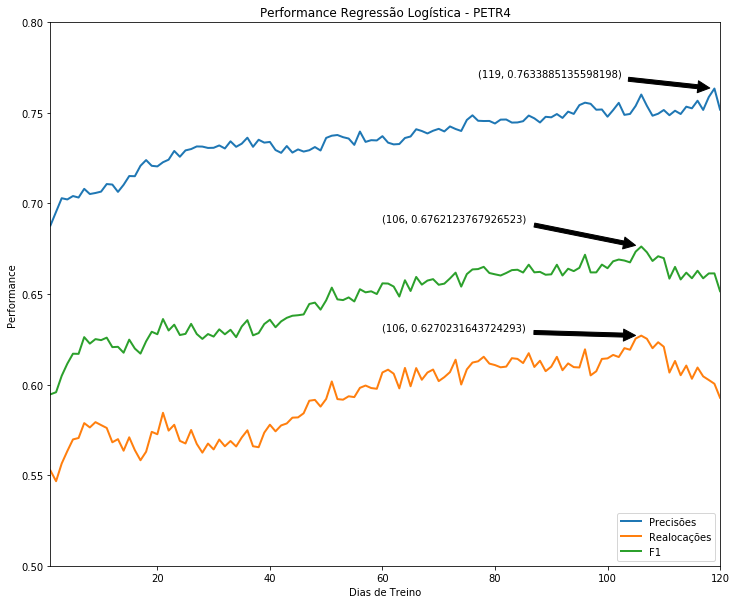

In [12]:
performance_plot(days, logreg_precisions, logreg_recalls, logreg_f1,(12,10), 'Performance Regressão Logística - PETR4', (77, 0.77),(60, 0.63),(60, 0.69))

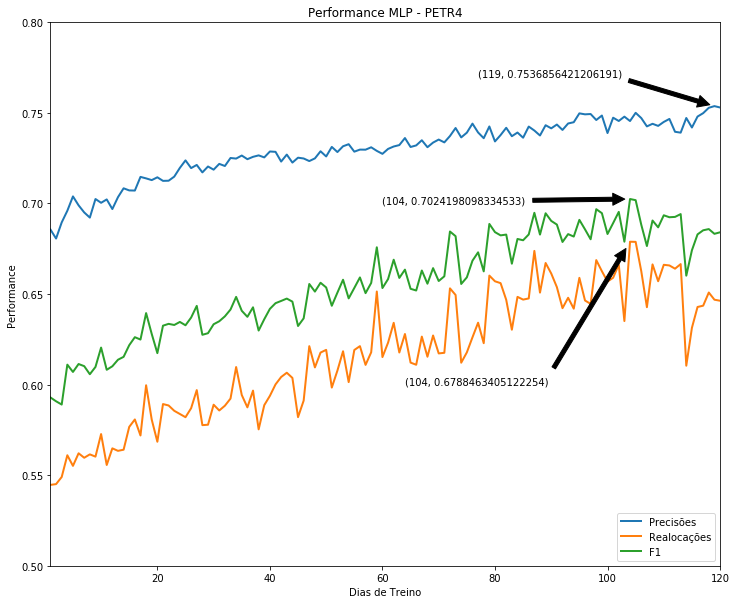

In [13]:
performance_plot(days, mlp_precisions, mlp_recalls, mlp_f1, (12,10), 'Performance MLP - PETR4', (77, 0.77),(64, 0.6),(60, 0.7))

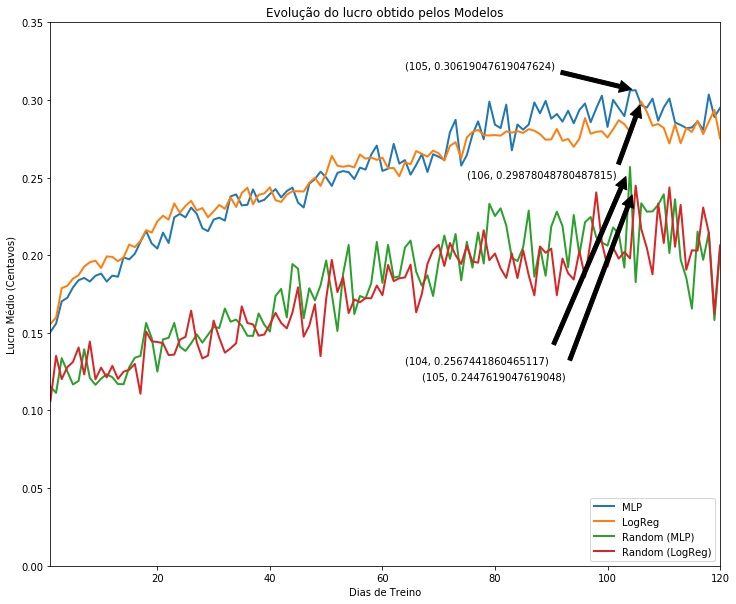

In [19]:
plt.figure(1, figsize=(12,10))

plt.subplot(111)
lines = plt.plot(days, mlp_profit, days, logreg_profit, days, mlp_random_profit, days, logreg_random_profit)
plt.setp(lines[0], linewidth=2)
plt.setp(lines[1], linewidth=2)
plt.setp(lines[2], linewidth=2)
plt.setp(lines[3], linewidth=2)
plt.legend(('MLP', 'LogReg', 'Random (MLP)', 'Random (LogReg)'),
        loc='lower right')
plt.title("Evolução do lucro obtido pelos Modelos")

xy_mlp = (mlp_profit.index(max(mlp_profit)) + 1, max(mlp_profit))
xy_logreg = (logreg_profit.index(max(logreg_profit)) + 1, max(logreg_profit))

xy_random_mlp = (mlp_random_profit.index(max(mlp_random_profit)) + 1, max(mlp_random_profit))
xy_random_logreg = (logreg_random_profit.index(max(logreg_random_profit)) + 1, max(logreg_random_profit))

plt.annotate(str(xy_mlp), xy=xy_mlp, xytext=(64,0.32),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.annotate(str(xy_logreg), xy=xy_logreg, xytext=(75,0.25),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.annotate(str(xy_random_mlp), xy=xy_random_mlp, xytext=(64,0.13),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.annotate(str(xy_random_logreg), xy=xy_random_logreg, xytext=(67,0.12),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(-0.0, 0.35)
plt.xlim(1,120)
plt.ylabel('Lucro Médio (Centavos)')
plt.xlabel('Dias de Treino')
plt.show()

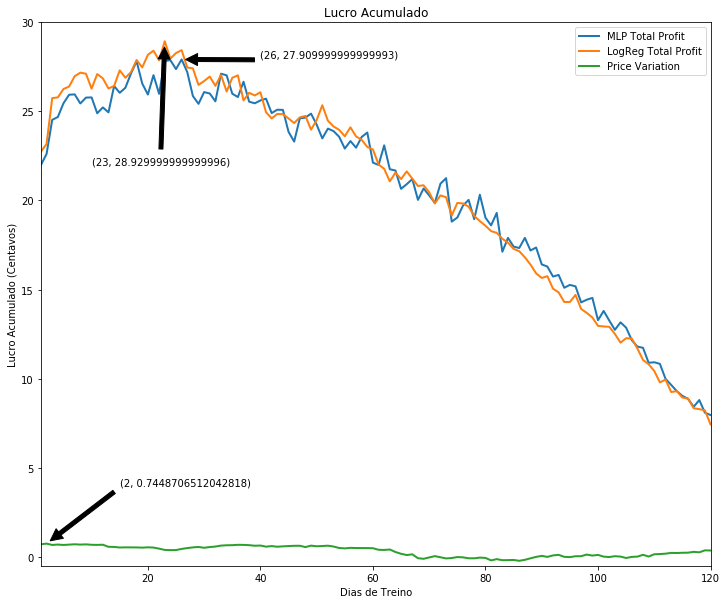

In [33]:
pv = price_variation[:120]

plt.figure(1, figsize=(12,10))

plt.subplot(111)
lines = plt.plot(days, mlp_total_profit, days, logreg_total_profit, days, pv)
plt.setp(lines[0], linewidth=2)
plt.setp(lines[1], linewidth=2)
plt.setp(lines[2], linewidth=2)
plt.legend(('MLP Total Profit', 'LogReg Total Profit', 'Price Variation'),
        loc='upper right')
plt.title("Lucro Acumulado")

xy_mlp = (mlp_total_profit.index(max(mlp_total_profit)) + 1, max(mlp_total_profit))
xy_logreg = (logreg_total_profit.index(max(logreg_total_profit)) + 1, max(logreg_total_profit))

xy_random_mlp = (pv.index(max(pv)) + 1, max(pv))

plt.annotate(str(xy_mlp), xy=xy_mlp, xytext=(40,28),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.annotate(str(xy_logreg), xy=xy_logreg, xytext=(10,22),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.annotate(str(xy_random_mlp), xy=xy_random_mlp, xytext=(15,4),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(-0.5, 30)
plt.xlim(1,120)
plt.ylabel('Lucro Acumulado (Centavos)')
plt.xlabel('Dias de Treino')
plt.show()

In [22]:
len(price_variation[:120])

120